In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

def rgb_to_gray(img_rgb):
    return np.dot(img_rgb[..., :3], [0.2989, 0.5870, 0.1140])

In [79]:
# Load a sample image
img_rgb = load_sample_image("china.jpg")  # shape: (427, 640, 3)

# Convert to grayscale
img_gray = rgb_to_gray(img_rgb)

# Convert to numpy array
img = np.array(img_gray).astype(np.uint8)

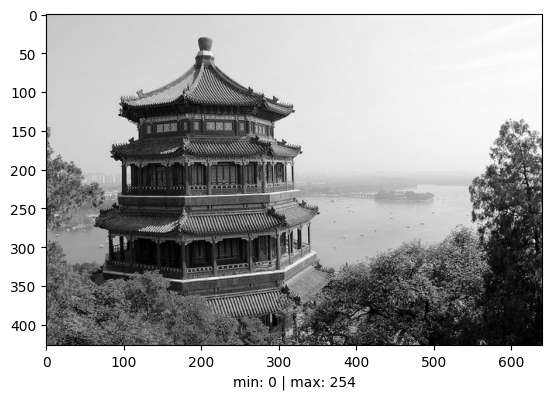

In [80]:
# Original Image
plt.imshow(img, cmap='gray')
plt.xlabel(f'min: {np.min(img)} | max: {np.max(img)}')
plt.show()

In [81]:
def detect_outliers(img, percent=5):
    # Compute the lower and upper thresholds
    lower_thresh = np.percentile(img, percent)
    upper_thresh = np.percentile(img, 100 - percent)

    data_mask = np.ones_like(img)
    data_mask[np.where(img < lower_thresh)] = 0
    data_mask[np.where(img > upper_thresh)] = 0

    return data_mask

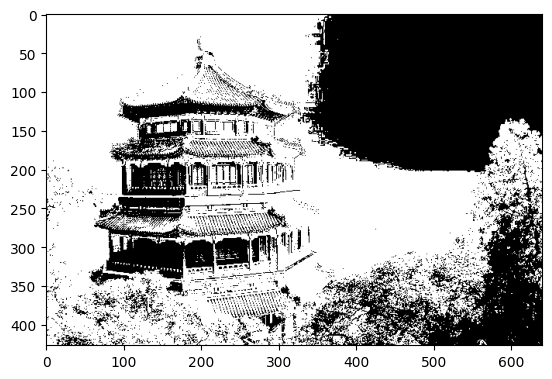

In [83]:
# Removing the 20% darkest pixels and the 20% brightest pixels
data_mask = detect_outliers(img, percent = 20)

# Filtered Image
plt.imshow(data_mask, cmap='gray')
plt.show()